In [3]:
# Total alternatives 23
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#plt.style.use(["seaborn-v0_8-colorblind", "../synergy/utils/graph.mplstyle"])
plt.style.use(["seaborn-v0_8-colorblind"])

#### Parameters definition

In [5]:
TECHNICAL_SCENARIO = [
    "Scenario 2",
    "Scenario 3",
    "Scenario 4",
    "Scenario 5",
    "Scenario 6",
    "Scenario 7",
    "Scenario 8",
]

ECONOMICAL_SCENARIO = [
    "Scenario 9",
    "Scenario 10",
    "Scenario 11",
    "Scenario 12",
    "Scenario 13",
    "Scenario 14",
    "Scenario 15",
]

ENVIRONMENTAL_SCENARIO = [
    "Scenario 16",
    "Scenario 17",
    "Scenario 18",
    "Scenario 19",
    "Scenario 20",
    "Scenario 21",
    "Scenario 22",
]

SOCIAL_SCENARIO = [
    "Scenario 23",
    "Scenario 24",
    "Scenario 25",
    "Scenario 26",
    "Scenario 27",
    "Scenario 28",
    "Scenario 29",
]

SCENARIO_DIC = {
    "Technical": TECHNICAL_SCENARIO,
    "Economical": ECONOMICAL_SCENARIO,
    "Environmental": ENVIRONMENTAL_SCENARIO,
    "Social": SOCIAL_SCENARIO,
}

#### Correlations 

In [6]:
def calculate_correlation_p_value(df):
    # DataFrame para guardar resultados
    results = {}
    # Iterar por las dimensiones
    for dimension in ["Environmental", "Technical", "Economical", "Social"]:
        df_dimension = df[dimension]
        correlation_matrix = df_dimension.corr()
        p_values_matrix = df_dimension.corr(
            method=lambda x, y: pearsonr(x, y)[1]
        )  # Obtención del p-value

        results[dimension] = {
            "correlation": correlation_matrix,
            "p_value": p_values_matrix,
        }
    return results


def calculate_weighted_ranking(df, weights):
    # Sumar rankings ponderados por dimensión
    df_weighted = df.copy()
    df_weighted["Weighted_Ranking"] = (
        df_weighted[TECHNICAL_SCENARIO].mul(weights["Technical"]).sum(axis=1)
        + df_weighted[ECONOMICAL_SCENARIO].mul(weights["Economical"]).sum(axis=1)
        + df_weighted[ENVIRONMENTAL_SCENARIO].mul(weights["Environmental"]).sum(axis=1)
        + df_weighted[SOCIAL_SCENARIO].mul(weights["Social"]).sum(axis=1)
    )
    return df_weighted


#### Plots

In [7]:
# 1. Heatmap de Correlación
def plot_correlation_heatmap(correlation_matrix, dimension, ax):
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=ax)
    ax.set_title(f"Correlation Heatmap - {dimension} Dimension")

In [8]:
# 2. Heatmap de Valores p
def plot_p_value_heatmap(p_values_matrix, dimension, ax):
    sns.heatmap(p_values_matrix, annot=True, cmap="YlGnBu", vmin=0, vmax=0.05, linewidths=.5, ax=ax)
    ax.set_title(f"p-value Heatmap - {dimension} Dimension")

In [9]:
def plot_correlation(correlation_matrix, p_values_matrix, dimension):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    plot_correlation_heatmap(correlation_matrix, dimension, axes[0])
    plot_p_value_heatmap(p_values_matrix, dimension, axes[1])
    plt.tight_layout()
    plt.show()


In [10]:
def plot_radar_chart_dimension(df):
    """
    Función para graficar un gráfico de radar para los rankings ponderados.
    """
    df_radar = df.copy()
    # Número de variables
    categories = list(df_radar.columns[1:])
    N = len(categories)

    # Ángulo de cada eje en el gráfico de radar
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Inicializar el gráfico
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Graficar cada alternativa
    for i in range(len(df_radar)):
        values = df_radar.loc[i].drop("Alternative").values.flatten().tolist()
        values += values[:1]
        ax.plot(
            angles,
            values,
            linewidth=1,
            linestyle="solid",
            label=df_radar.loc[i, "Alternative"],
        )
        ax.fill(angles, values, alpha=0.1)

    # Añadir etiquetas
    plt.xticks(angles[:-1], categories, color="grey", size=8)
    ax.set_rlabel_position(0)
    plt.yticks([5, 10, 15, 20], ["5", "10", "15", "20"], color="grey", size=7)
    plt.ylim(0, 20)

    # Añadir leyenda
    plt.legend(loc="upper right", bbox_to_anchor=(0.1, 0.1))

    plt.show()


In [11]:
# 3. Gráfico de Barras Apiladas para Rankings Ponderados
def plot_stacked_bar(df):
    df_stack = df.copy()
    df_stack["Technical"] = 7/df_stack[TECHNICAL_SCENARIO].sum(axis=1)*25
    df_stack["Economical"] = 7/ df_stack[ECONOMICAL_SCENARIO].sum(axis=1)*25
    df_stack["Environmental"] = 7/df_stack[ENVIRONMENTAL_SCENARIO].sum(axis=1)*25
    df_stack["Social"] = 7/df_stack[SOCIAL_SCENARIO].sum(axis=1)*25

    df_ranking = df_stack[["Alternative", "Technical", "Economical", "Environmental", "Social"]]
    #plot_radar_chart_dimension(df_ranking)
    df_ranking.set_index("Alternative", inplace=True)
    df_ranking.plot(kind="bar", stacked=True, figsize=(12, 8))
    plt.title("Stacked Bar Plot - Weighted Rankings by Dimension")
    plt.ylabel("Weighted Ranking")
    plt.show()


In [12]:

def plot_weighted_bar(df):
    df_weighted_ranking = df[["Alternative", "Weighted_Ranking"]].copy()
    df_weighted_ranking.set_index("Alternative", inplace=True)
    df_weighted_ranking.plot(kind="bar", figsize=(12, 8))


In [13]:

# 4. Gráfico de Radar para Comparación Multidimensional
def plot_radar_chart(df, alternatives):
    # Setup Radar Chart
    df_plot_radar = df.copy()
    categories = ["Technical", "Economical", "Environmental", "Social"]
    N = len(categories)

    for alt in alternatives:
        values = (
            df_plot_radar[df_plot_radar["Alternative"] == alt][
                [
                    "Technical",
                    "Economical",
                    "Environmental",
                    "Social",
                ]
            ]
            .values.flatten()
            .tolist()
        )
        values += values[:1]  # Repetir el primer valor al final para cerrar el gráfico
        angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
        angles += angles[:1]

        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
        ax.fill(angles, values, color="blue", alpha=0.25)
        ax.plot(angles, values, color="blue", linewidth=2)
        ax.set_yticklabels([])
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories)
        plt.title(f"Radar Chart for {alt}")
        plt.show()

In [14]:
# 5. Boxplot por Dimensión
def plot_boxplot(df):
    df_to_plot = df.copy()
    df_melted = df_to_plot.melt(
        id_vars=["Alternative"], var_name="Scenario", value_name="Value"
    )

    plt.figure(figsize=(10, 8))
    sns.boxplot(x='Alternative', y='Value', data=df_melted)
    plt.title('Boxplot por Alternativa considerando todos los Escenarios')
    plt.show()

In [15]:
def plot_scatter_by_dimension(df, dimension):
    df_to_plot = df[SCENARIO_DIC[dimension] + ["Alternative"]].copy()
    df_melted = df_to_plot.melt(
        id_vars=["Alternative"], var_name="Scenario", value_name="Value"
    )

    g = sns.FacetGrid(df_melted, col="Scenario", col_wrap=4, height=4)
    g.map(sns.scatterplot, "Alternative", "Value")
    g.set_titles("{col_name}")
    g.fig.suptitle(f"Scatterplot por Alternativa - {dimension} Dimension", y=1.02)
    plt.tight_layout()
    plt.show()

#### Main Function

In [16]:
def analysis(df):
    df_dummy = df.copy()
    df_dummy.drop(columns=["Alternative"], inplace=True)

    # Crear un diccionario para almacenar los DataFrames por dimensión
    analysis_dict = {}

    # Verificar y crear DataFrames para cada dimensión
    if all(col in df_dummy.columns for col in TECHNICAL_SCENARIO):
        df_technical = df_dummy[TECHNICAL_SCENARIO].copy()
        analysis_dict["Technical"] = df_technical

    if all(col in df_dummy.columns for col in ECONOMICAL_SCENARIO):
        df_economical = df_dummy[ECONOMICAL_SCENARIO].copy()
        analysis_dict["Economical"] = df_economical

    if all(col in df_dummy.columns for col in ENVIRONMENTAL_SCENARIO):
        df_environmental = df_dummy[ENVIRONMENTAL_SCENARIO].copy()
        analysis_dict["Environmental"] = df_environmental

    if all(col in df_dummy.columns for col in SOCIAL_SCENARIO):
        df_social = df_dummy[SOCIAL_SCENARIO].copy()
        analysis_dict["Social"] = df_social

    # Crear los heatmaps solo para las dimensiones disponibles
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes = axes.flatten()
    for i, (dimension, df_dimension) in enumerate(analysis_dict.items()):
        sns.heatmap(df_dimension.corr(), annot=True, ax=axes[i])
        axes[i].set_title(f"{dimension} dimension")
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")
        axes[i].set_yticklabels(axes[i].get_yticklabels(), rotation=0)
        axes[i].tick_params(axis="both", which="both", length=0)

    plt.subplots_adjust(wspace=0.4, hspace=0.6)

    # Definir pesos (puedes ajustar según tu criterio)
    weights = {"Technical": 0.25, "Economical": 0.25, "Environmental": 0.25, "Social": 0.25}

    # Calcular la correlación y el valor p
    correlation_p_value_results = calculate_correlation_p_value(analysis_dict)

    # Calcular los rankings ponderados
    df_weighted_ranking = calculate_weighted_ranking(df, weights)

    # Gráficos
    for dimension in analysis_dict.keys():
        continue
        plot_correlation(
            correlation_p_value_results[dimension]["correlation"],
            correlation_p_value_results[dimension]["p_value"],
            dimension,
        )

    #plot_weighted_bar(df_weighted_ranking)
    # Corregir el gráfico de barras apiladas para rankings ponderados
    #plot_stacked_bar(df_weighted_ranking)

    # Gráficos adicionales
    # plot_radar_chart(df_weighted_ranking, df["Alternative"].tolist())
    plot_boxplot(df)
    for dimension in analysis_dict.keys():
       plot_scatter_by_dimension(df, dimension)
    # Mostrar la visualización
    plt.show()

#### Execution

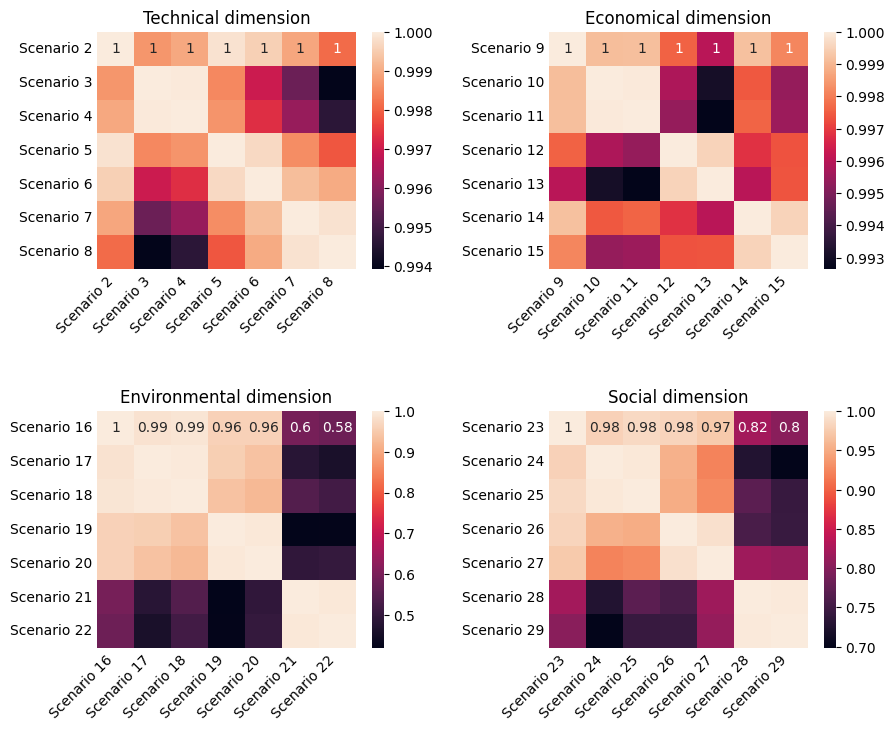

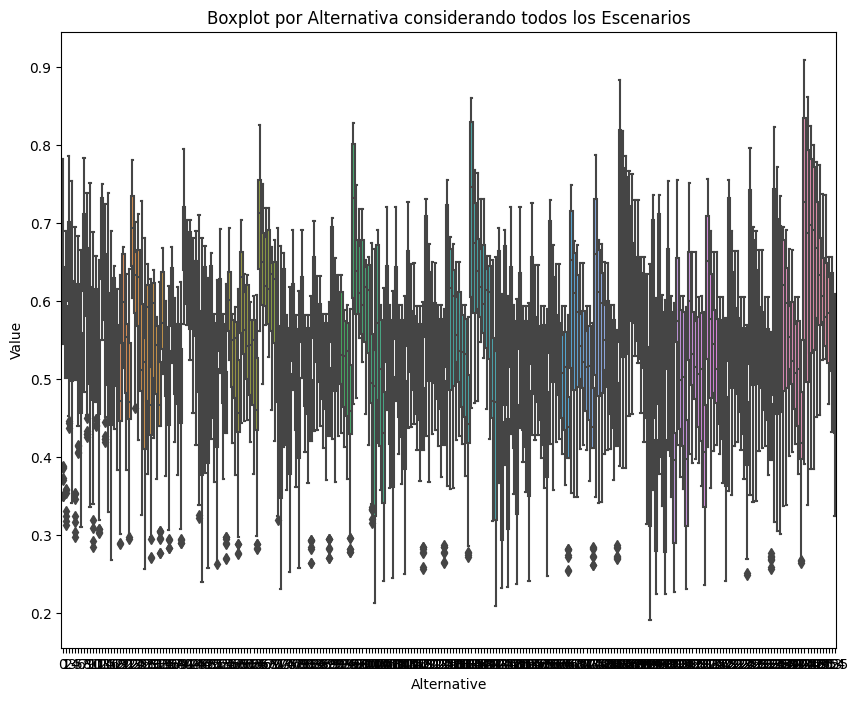

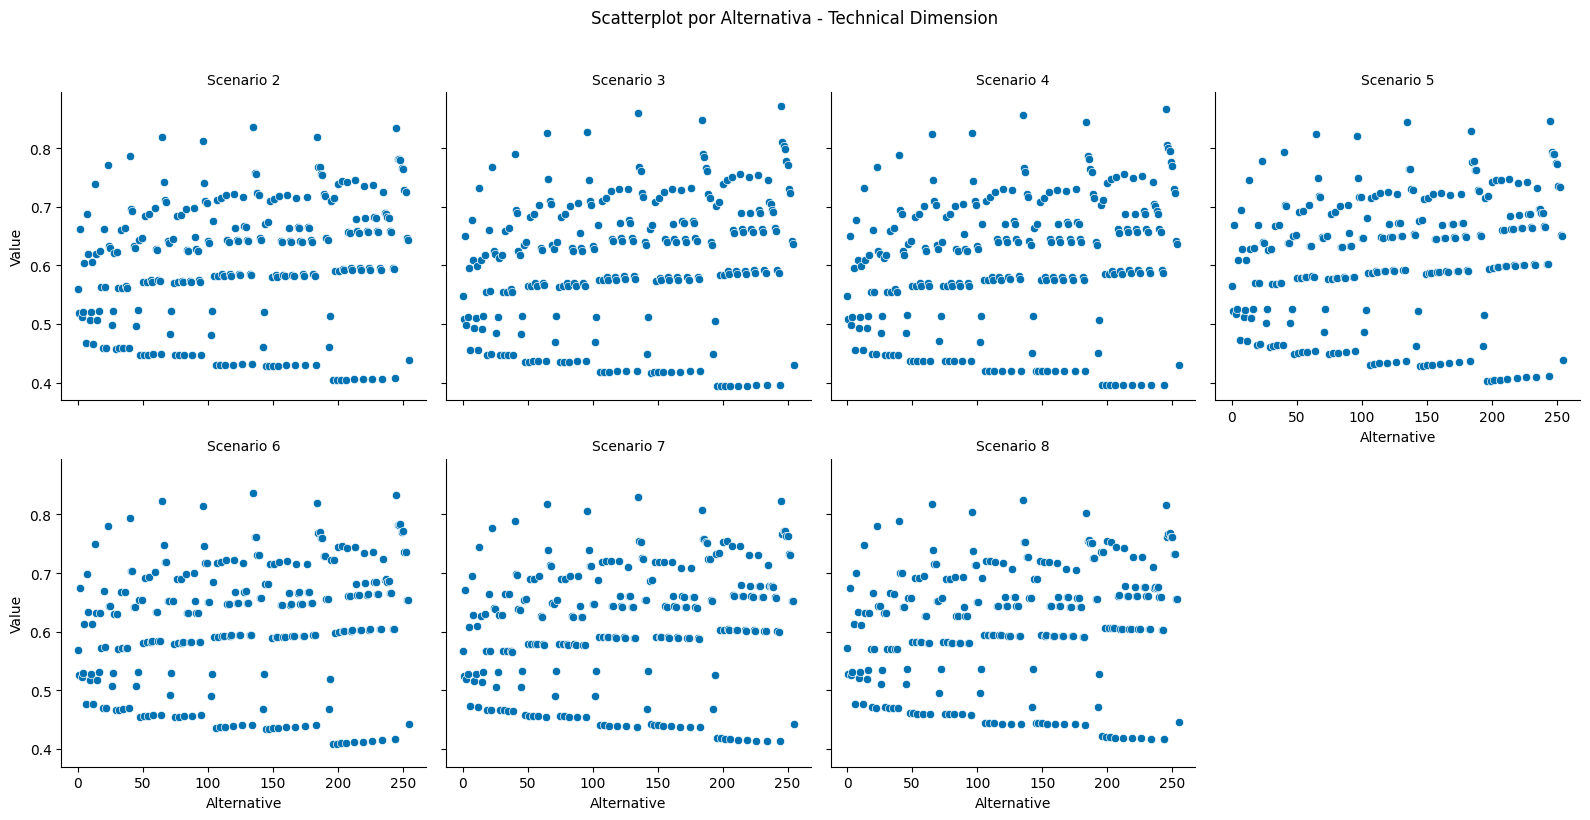

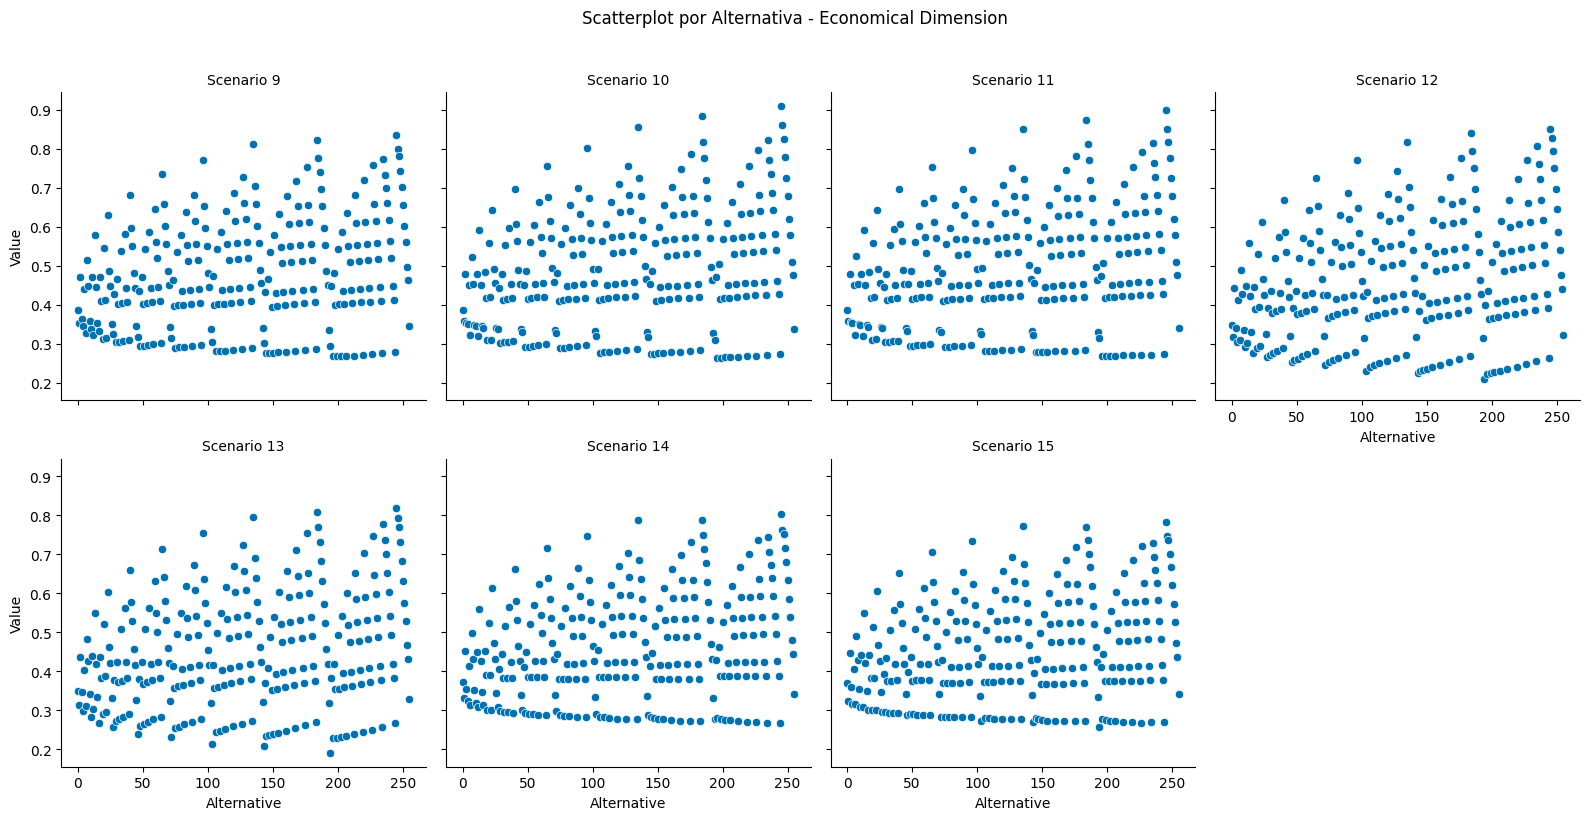

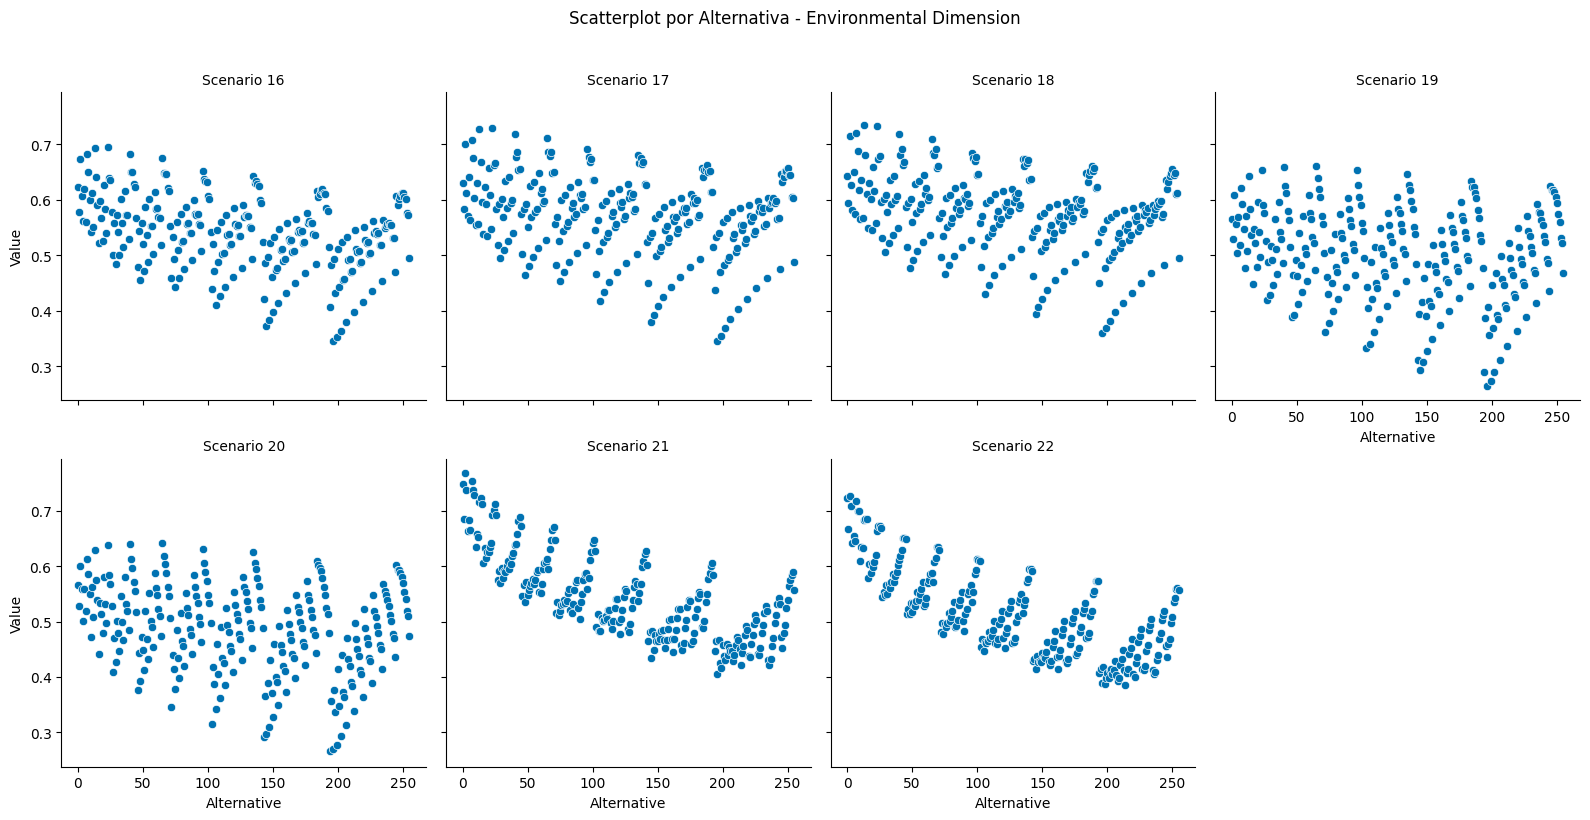

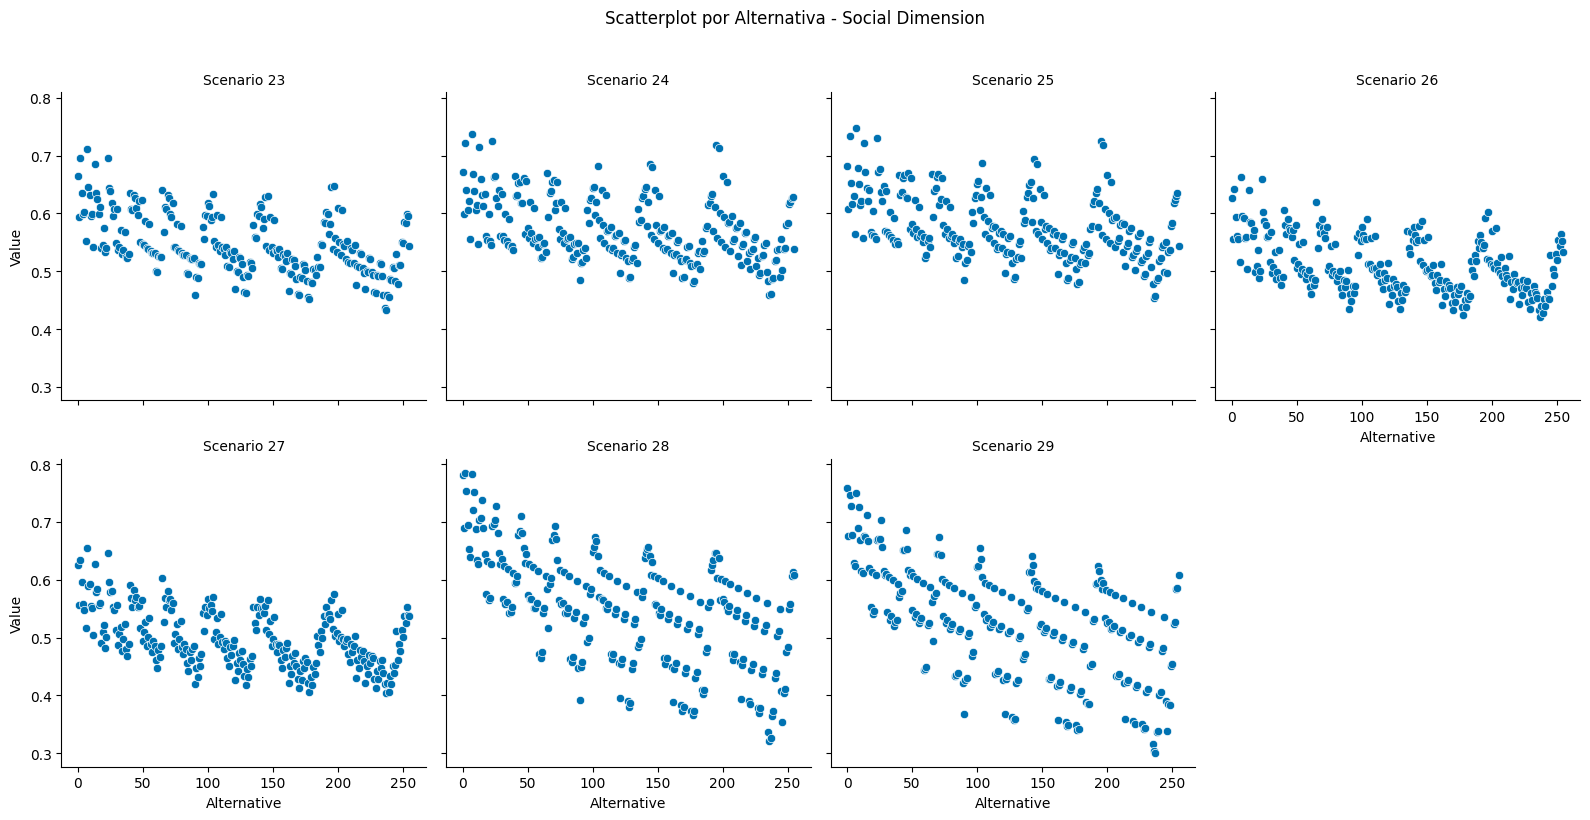

In [17]:
CASE_STUDY = "santa_rosalia"
FILE = f"../case_studies/{CASE_STUDY}/results/ranking_of_256_alternatives.xlsx"
# Read the Excel file into a pandas DataFrame
df = pd.read_excel(FILE)
df.rename(columns={"Unnamed: 0": "Alternative"}, inplace=True)
df.head()
analysis(df)

In [18]:
def plot_alternatives(df, dimension):
    df_test_df = df[SCENARIO_DIC[dimension]].copy()
    df_test_df["Total"] = df_test_df.sum(axis=1)
    df_sorted = df_test_df.sort_values(by="Total", ascending=False).drop(columns=["Total"])
    subset = df_sorted.iloc[0:5]
    fig = plt.figure()
    subset.T.plot(figsize=(10, 8), linewidth=2, colormap='Set2')
    plt.title(f"Evolución de Alternativas a lo Largo de los Escenarios - {dimension} Dimension", fontsize=16)
    plt.xlabel("Escenarios", fontsize=12)
    plt.ylabel("Valor", fontsize=12)
    plt.legend(title="Alternativas", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', linewidth=0.5)

    plt.figure(figsize=(12, 6))
    sns.violinplot(data=df_sorted)
    plt.title("Distribución de Valores por Escenario (Violin Plots)")
    plt.xlabel("Escenarios")
    plt.ylabel("Valor")
    plt.show()

    plt.show()

<Figure size 640x480 with 0 Axes>

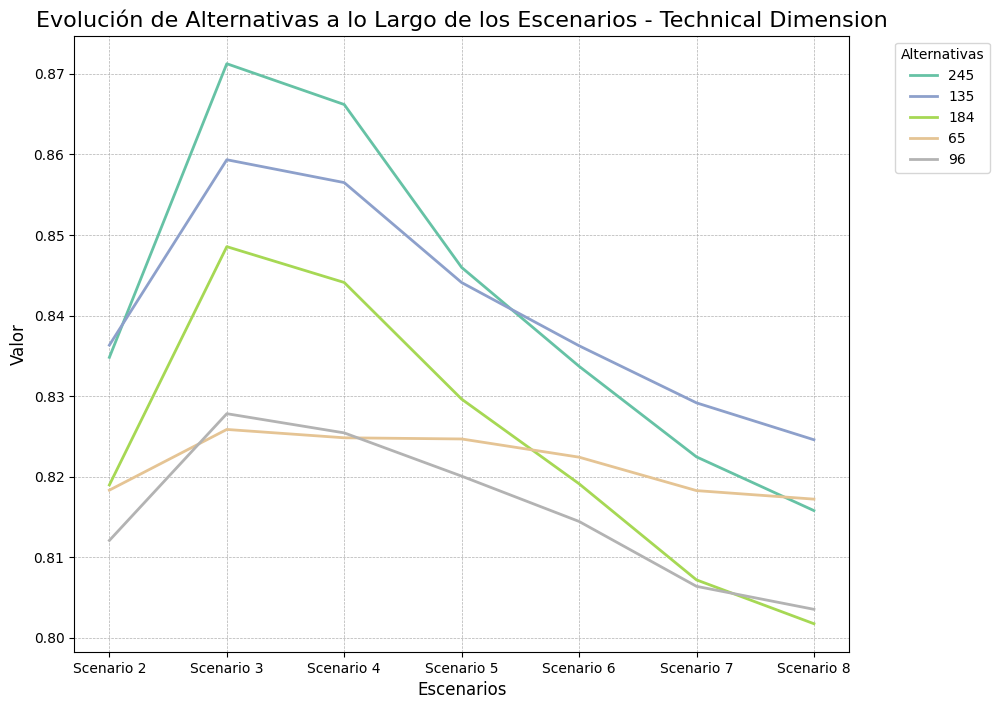

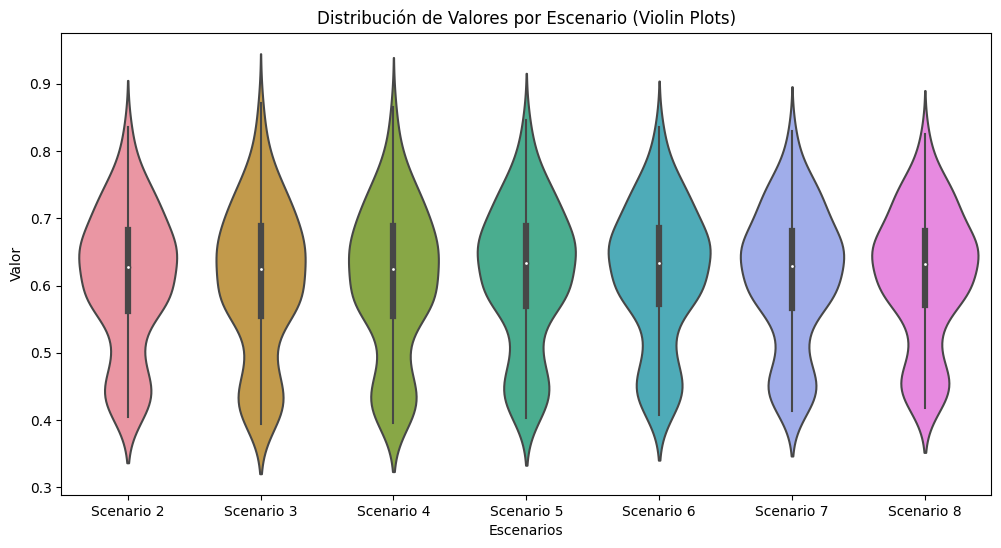

<Figure size 640x480 with 0 Axes>

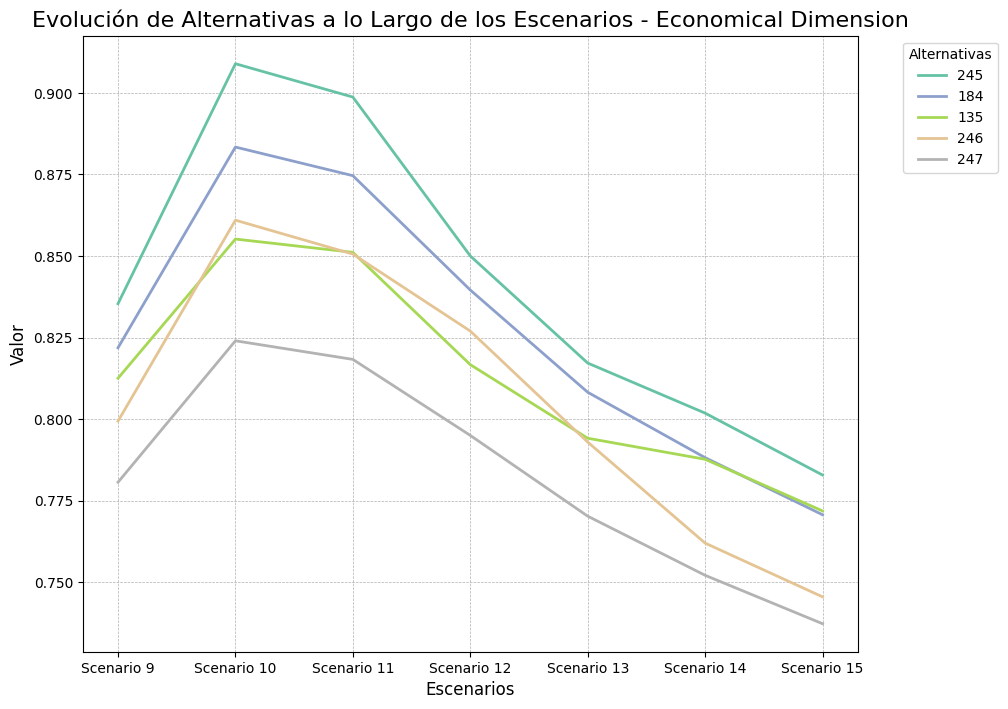

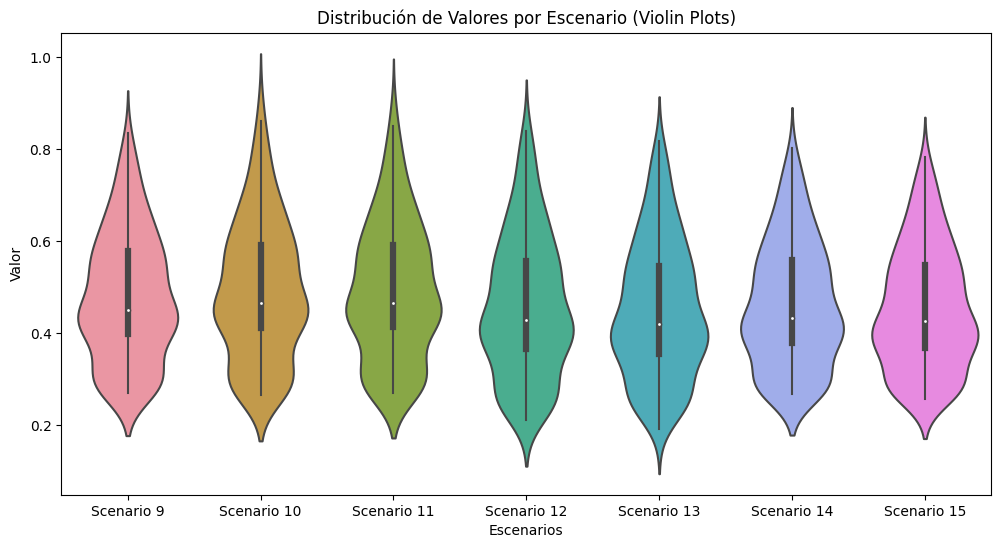

<Figure size 640x480 with 0 Axes>

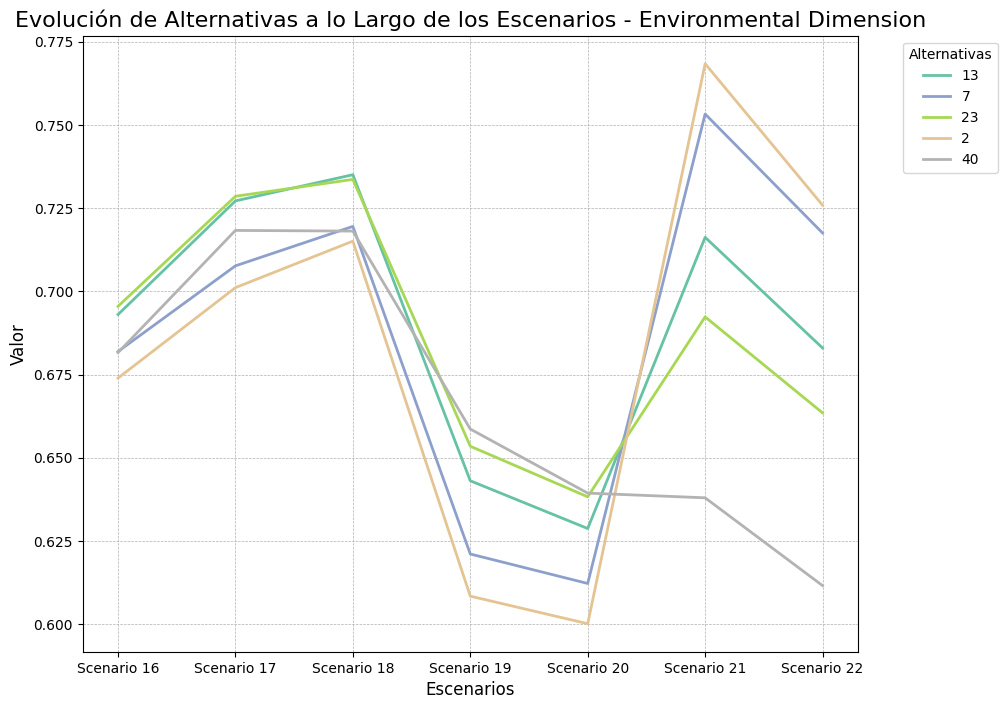

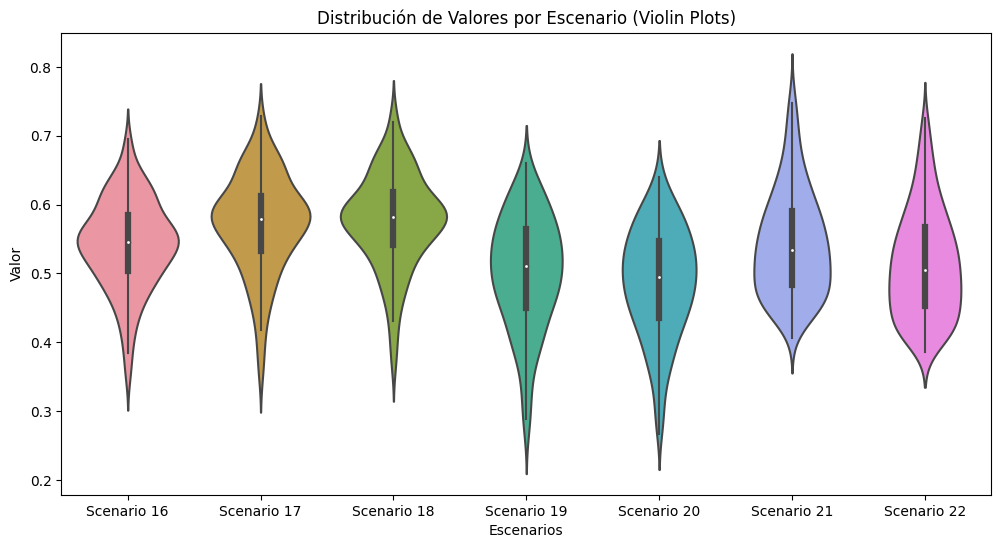

<Figure size 640x480 with 0 Axes>

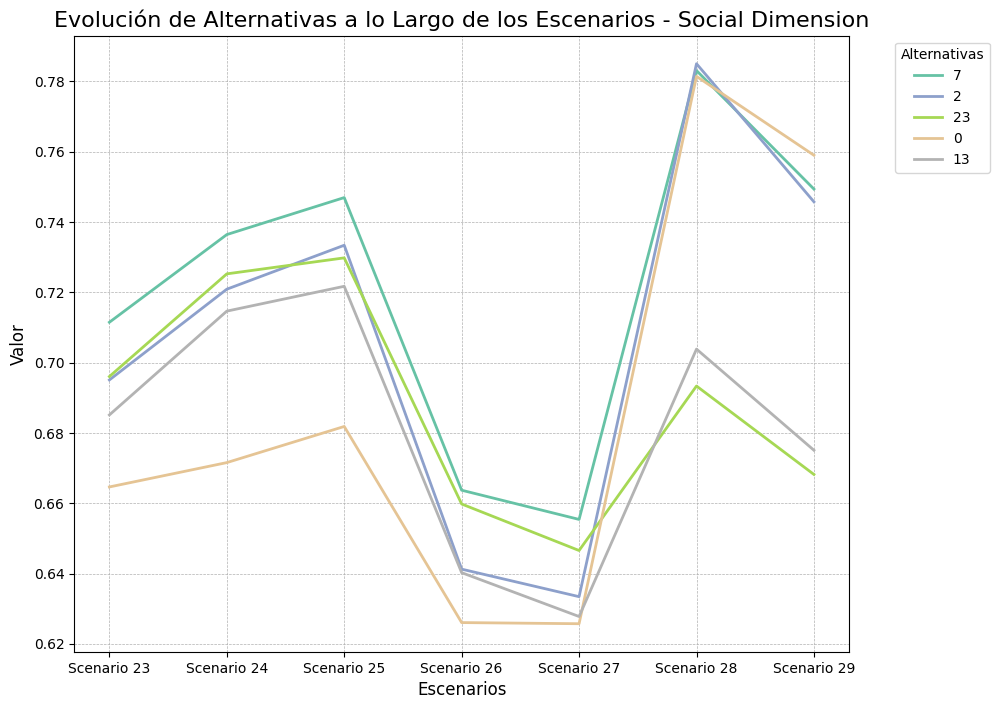

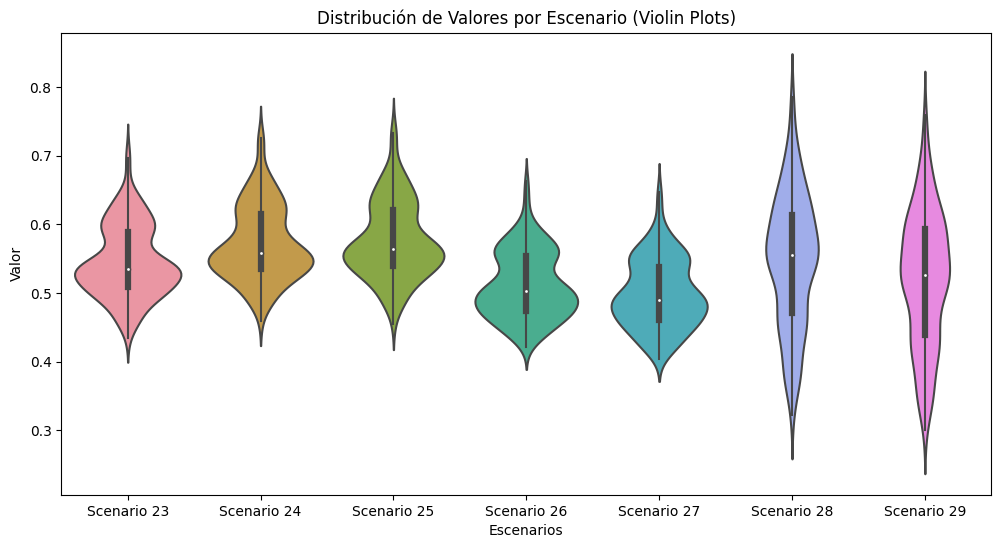

In [19]:
for dimension in SCENARIO_DIC.keys():
    plot_alternatives(df, dimension)

### New TOPSIS Evaluation

In [20]:
df_topsis = df.copy().drop("Alternative", axis=1).reset_index(drop=True)
ideal_positive = np.zeros(len(df_topsis.columns))
ideal_negative = np.zeros(len(df_topsis.columns))
alternatives_array = df_topsis.to_numpy(copy=True)
for i in range(len(df_topsis.columns)):
    ideal_positive[i] = np.max(alternatives_array[i, :])
    ideal_negative[i] = np.min(alternatives_array[i, :])

In [21]:
positive_distance = np.sqrt(
    np.sum((alternatives_array.T - np.transpose([ideal_positive])) ** 2, 0)
)
negative_distance = np.sqrt(
    np.sum((alternatives_array.T - np.transpose([ideal_negative])) ** 2, 0)
)

similarity_index = negative_distance / (positive_distance + negative_distance)
similarity_index.shape

(256,)

In [22]:
FILE_ALTERNATIVES = f"../case_studies/{CASE_STUDY}/results/alternatives_256.xlsx"
df_resource_distribution = pd.read_excel(FILE_ALTERNATIVES)
df_resource_distribution = df_resource_distribution.drop(["Unnamed: 0", "solar_generation", "hydro_generation", "wind_generation", "biomass_generation"], axis=1)
df_resource_distribution["Similarity Index"] = similarity_index
df_resource_distribution.head()

,solar,wind,hydro,biomass,Similarity Index
0,500,0,0,0,0.547081
1,450,50,0,0,0.463220
2,450,0,50,0,0.665998
3,450,0,0,50,0.498427
4,400,100,0,0,0.455149


,Alternative,Scenario 1,Scenario 2,Scenario 3,Scenario 4,Scenario 5,Scenario 6,Scenario 7,Scenario 8,Scenario 9,...,Scenario 20,Scenario 21,Scenario 22,Scenario 23,Scenario 24,Scenario 25,Scenario 26,Scenario 27,Scenario 28,Scenario 29
0,0,0.544282,0.559916,0.547852,0.548462,0.563933,0.569071,0.567586,0.572029,0.387000,...,0.565955,0.747613,0.722776,0.664628,0.671555,0.681833,0.626046,0.625721,0.781424,0.758987
1,1,0.500538,0.518275,0.508682,0.508921,0.522543,0.526564,0.523948,0.527697,0.353031,...,0.528126,0.684135,0.667217,0.593731,0.599210,0.607960,0.556158,0.555450,0.689830,0.675388
2,2,0.617096,0.661631,0.650256,0.650506,0.668777,0.674101,0.670273,0.675312,0.472013,...,0.600127,0.768424,0.725908,0.695067,0.720884,0.733383,0.641245,0.633417,0.785023,0.745744
3,3,0.507153,0.512081,0.497549,0.498108,0.516639,0.522634,0.519949,0.525303,0.362745,...,0.558174,0.737032,0.708970,0.634530,0.641092,0.652676,0.594534,0.595483,0.753964,0.728115
4,4,0.498622,0.521086,0.511285,0.511725,0.525078,0.529323,0.527735,0.531481,0.345420,...,0.500940,0.662749,0.641520,0.598133,0.606620,0.615501,0.560029,0.557825,0.694539,0.676799


In [26]:
df_to_merge = df.drop(columns="Alternative").copy()
df_full = pd.merge(df_to_merge, df_resource_distribution, left_index=True, right_index=True)
df_full.head()

,Scenario 1,Scenario 2,Scenario 3,Scenario 4,Scenario 5,Scenario 6,Scenario 7,Scenario 8,Scenario 9,Scenario 10,...,Scenario 25,Scenario 26,Scenario 27,Scenario 28,Scenario 29,solar,wind,hydro,biomass,Similarity Index
0,0.544282,0.559916,0.547852,0.548462,0.563933,0.569071,0.567586,0.572029,0.387000,0.385858,...,0.681833,0.626046,0.625721,0.781424,0.758987,500,0,0,0,0.547081
1,0.500538,0.518275,0.508682,0.508921,0.522543,0.526564,0.523948,0.527697,0.353031,0.357572,...,0.607960,0.556158,0.555450,0.689830,0.675388,450,50,0,0,0.463220
2,0.617096,0.661631,0.650256,0.650506,0.668777,0.674101,0.670273,0.675312,0.472013,0.479395,...,0.733383,0.641245,0.633417,0.785023,0.745744,450,0,50,0,0.665998
3,0.507153,0.512081,0.497549,0.498108,0.516639,0.522634,0.519949,0.525303,0.362745,0.353406,...,0.652676,0.594534,0.595483,0.753964,0.728115,450,0,0,50,0.498427
4,0.498622,0.521086,0.511285,0.511725,0.525078,0.529323,0.527735,0.531481,0.345420,0.351560,...,0.615501,0.560029,0.557825,0.694539,0.676799,400,100,0,0,0.455149


In [40]:
top_fifteen = df_full.sort_values(
    by="Similarity Index", ascending=False
).copy().iloc[:15]
top_fifteen

,Scenario 1,Scenario 2,Scenario 3,Scenario 4,Scenario 5,Scenario 6,Scenario 7,Scenario 8,Scenario 9,Scenario 10,...,Scenario 25,Scenario 26,Scenario 27,Scenario 28,Scenario 29,solar,wind,hydro,biomass,Similarity Index
23,0.711663,0.771476,0.767557,0.767468,0.777921,0.780309,0.777246,0.779730,0.631323,0.644181,...,0.729793,0.659779,0.646547,0.693337,0.668184,300,0,200,0,0.829809
40,0.720006,0.786920,0.789568,0.788647,0.794115,0.793626,0.788141,0.788701,0.680980,0.698116,...,0.666154,0.606354,0.590729,0.594668,0.570342,250,0,250,0,0.824335
65,0.744561,0.818321,0.825858,0.824822,0.824677,0.822416,0.818266,0.817207,0.734463,0.754989,...,0.668747,0.619181,0.603280,0.583605,0.561205,200,0,300,0,0.820368
13,0.680770,0.738316,0.731852,0.731715,0.745765,0.749150,0.744744,0.748275,0.578642,0.590815,...,0.721707,0.640249,0.627769,0.703841,0.675071,350,0,150,0,0.781819
96,0.731739,0.812078,0.827815,0.825432,0.820060,0.814436,0.806381,0.803528,0.770185,0.800849,...,0.602778,0.558977,0.542012,0.491412,0.467361,150,0,350,0,0.765661
67,0.657874,0.711520,0.710397,0.709805,0.717976,0.718909,0.714025,0.715623,0.601312,0.613910,...,0.637890,0.580205,0.568348,0.593146,0.572361,200,0,200,100,0.757291
66,0.678124,0.741695,0.746641,0.745108,0.749698,0.748012,0.739939,0.740007,0.658928,0.676649,...,0.594043,0.540632,0.526197,0.515748,0.493529,200,0,250,50,0.756062
136,0.690380,0.757677,0.767200,0.765500,0.764633,0.761222,0.754239,0.752790,0.703663,0.725445,...,0.584068,0.540561,0.525520,0.489451,0.468274,100,0,300,100,0.753477
135,0.745518,0.836324,0.859341,0.856503,0.844092,0.836248,0.829159,0.824578,0.812533,0.855201,...,0.604328,0.568644,0.552077,0.484118,0.462527,100,0,400,0,0.751876
41,0.650023,0.696231,0.694861,0.694269,0.702174,0.703093,0.698245,0.699829,0.595919,0.606928,...,0.632519,0.579097,0.568848,0.595683,0.576990,250,0,200,50,0.748874


### Graph test

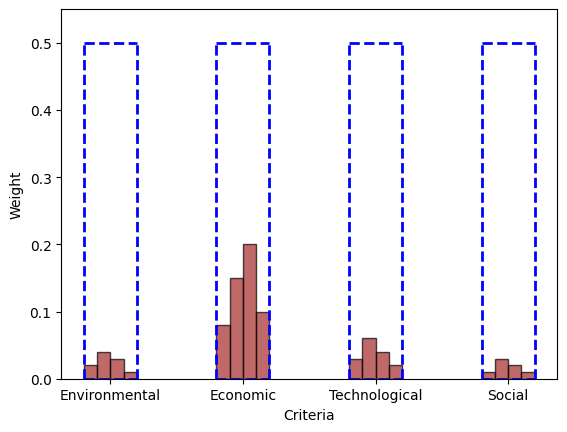

In [39]:
def new_plot(data):
    # Datos de ejemplo para los criterios y subcriterios
    criterios = ['Environmental', 'Economic', 'Technological', 'Social']
    subcriterios = ['Sub1', 'Sub2', 'Sub3', 'Sub4']

    # Pesos de subcriterios para cada criterio
    pesos = {
        'Environmental': [0.02, 0.04, 0.03, 0.01],
        'Economic': [0.08, 0.15, 0.2, 0.1],
        'Technological': [0.03, 0.06, 0.04, 0.02],
        'Social': [0.01, 0.03, 0.02, 0.01]
    }

    # Configuración del gráfico
    fig, ax = plt.subplots()

    # Anchura de las barras
    bar_width = 0.1

    # Posiciones de las barras
    indices = np.arange(len(criterios))

    # Dibujar barras y contornos para cada criterio
    for i, criterio in enumerate(criterios):
        # Pesos de subcriterios para el criterio actual
        sub_pesos = pesos[criterio]
        
        # Dibujar las barras para los subcriterios
        for j, peso in enumerate(sub_pesos):
            ax.bar(i + j * bar_width, peso, width=bar_width, color='brown', alpha=0.7, edgecolor='black')
        
        # Dibujar el contorno del grupo de barras
        ax.plot([i - bar_width / 2, i + 3.5 * bar_width], [0.5, 0.5], 'b--', linewidth=2)
        ax.plot([i - bar_width / 2, i + 3.5 * bar_width], [0, 0], 'b--', linewidth=2)
        ax.plot([i - bar_width / 2, i - bar_width / 2], [0, 0.5], 'b--', linewidth=2)
        ax.plot([i + 3.5 * bar_width, i + 3.5 * bar_width], [0, 0.5], 'b--', linewidth=2)

    # Configuración de los ejes y etiquetas
    ax.set_xlabel('Criteria')
    ax.set_ylabel('Weight')
    ax.set_xticks(indices + bar_width * 1.5)
    ax.set_xticklabels(criterios)
    ax.set_ylim(0, 0.55)

    # Mostrar gráfico
    plt.show()


new_plot(df_full.copy())  

In [53]:
%pip install pywaffle


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


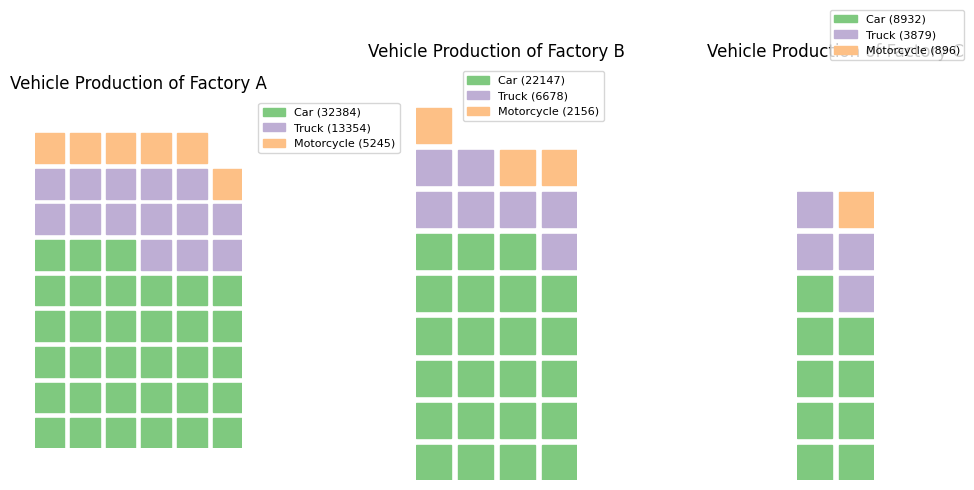

In [71]:
from pywaffle import Waffle

# Datos de ejemplo para los ciclones por año y tipo
data = pd.DataFrame(
    {
        "labels": ["Car", "Truck", "Motorcycle"],
        "Factory A": [32384, 13354, 5245],
        "Factory B": [22147, 6678, 2156],
        "Factory C": [8932, 3879, 896],
    },
).set_index("labels")

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        131: {
            "values": data["Factory A"]
            / 1000,  # Convert actual number to a reasonable block number
            "labels": [f"{k} ({v})" for k, v in data["Factory A"].items()],
            "legend": {"loc": "best", "bbox_to_anchor": (1.05, 1), "fontsize": 8},
            "title": {
                "label": "Vehicle Production of Factory A",
                "loc": "center",
                "fontsize": 12,
            },
            "vertical": True,
        },
        132: {
            "values": data["Factory B"] / 1000,
            "labels": [f"{k} ({v})" for k, v in data["Factory B"].items()],
            "legend": {"loc": "best", "bbox_to_anchor": (1.2, 1), "fontsize": 8},
            "title": {
                "label": "Vehicle Production of Factory B",
                "loc": "center",
                "fontsize": 12,
            },
            "vertical": True,
        },
        133: {
            "values": data["Factory C"] / 1000,
            "labels": [f"{k} ({v})" for k, v in data["Factory C"].items()],
            "legend": {
                "loc": "lower center",
                "bbox_to_anchor": (1.3, 1),
                "fontsize": 8,
            },
            "title": {
                "label": "Vehicle Production of Factory C",
                "loc": "center",
                "fontsize": 12,
            },
            "vertical": True,
        },
    },
    rows=10,  # Outside parameter applied to all subplots, same as below
    cmap_name="Accent",  # Change color with cmap
    rounding_rule="ceil",  # Change rounding rule, so value less than 1000 will still have at least 1 block
    figsize=(10, 5),
)


# Mostrar el gráfico
plt.show()